# Testing Kim filter

This notebook replicates the results presented in Kim and Nelson(1999, pp. 109-112)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

from kim_filter import *
from lam_sysmat import *
from lam_constraints import *

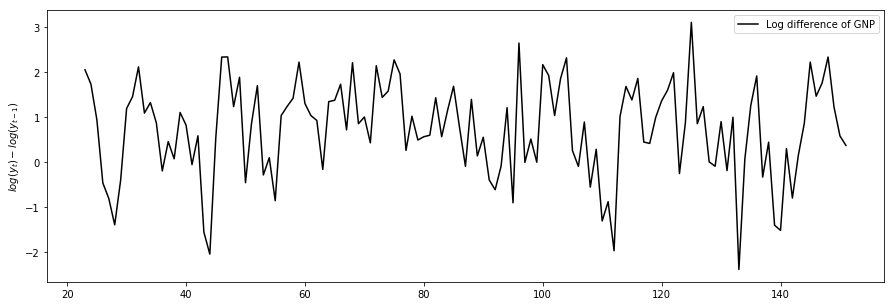

In [2]:
dados = pd.read_table('kim_je.prn', header=None, skipfooter=1,delim_whitespace=True, engine='python')

# Select data from 1952:2 to 1984:4
dados = dados[22:152]

# 100 times the log-difference
yy = 100*(np.log(dados[1])).diff().dropna()

# Plot data
fig=plt.figure(figsize=(15,5))
plt.plot(yy, color='k', label="Log difference of GNP")
plt.ylabel("$log(y_t) - log(y_{t-1})$")
plt.legend()
plt.savefig("logdiff.pdf")
plt.show()

yy = (yy.values).reshape((len(yy),1))

params0  = [3.5,0.0,0.5,1,0.7,-0.4, 1.7]
#params0 = [0.954, 0.465, -1.457, 2.42, 0.773, 1.246, -0.367, 5.224, 0.535]

In [5]:
def objective(params, model_constraints, model_ssf, Filter, y, log_start=0):

    params_const = model_constraints(params).T[0]
    mat = model_ssf(params_const, yy)
    result = kim_filter(mat, log_start)
    value = result.logL
    
    return -value

In [6]:
sol = opt.minimize(objective, params0, args = (lam_constraints, sys_mat, kim_filter, yy), method='Nelder-Mead')

In [7]:
params_cas = np.round(lam_constraints(sol.x), decimals=3)
params_kim = np.array([0.954, 0.465, -1.457, 2.421, 0.773, 1.246, -0.367])
params_lam = np.array([0.957, 0.508, -1.483, 2.447, 0.771, 1.244, -0.382])

# Tabela com os parâmetros

In [8]:
table1 = pd.DataFrame({"Cássio": params_cas[:,0], 
                      "Kim"   : params_kim,
                      "Lam"   : params_lam})
table1

,Cássio,Kim,Lam
0,0.953,0.954,0.957
1,0.501,0.465,0.508
2,-1.350,-1.457,-1.483
3,2.313,2.421,2.447
4,0.779,0.773,0.771
5,1.243,1.246,1.244
6,-0.355,-0.367,-0.382


# Tabela com a verossimilhança

In [10]:
# Cássio

mat_cas = sys_mat(params_cas[:,0],yy)
log_cas = kim_filter(mat_cas).logL 

# Kim

mat_kim = sys_mat(params_kim,yy)
log_kim = kim_filter(mat_kim).logL 

# lam

mat_lam = sys_mat(params_lam,yy)
log_lam = kim_filter(mat_lam).logL

# Table to compare loglikelihood

table2 = pd.DataFrame({"Cássio": [round(log_cas,2)],
                       "Kim":    [round(log_kim,2)],
                       "Lam":    [round(log_lam,2)]})
table2

,Cássio,Kim,Lam
0,-177.06,-177.07,-177.29


Observação: O valor da verossimilhança das colunas "Kim" e "Lam" foram calculados usando a minha função do filtro de Kim com o valor dos parâmetros descritos no livro (tabela 5.1, p.112). O valor da verossimilhança descrito no livro foi de $-176.33$ com o filtro de Kim e o valor encontrado por Lam (1980) foi de $-174.97$.  

In [11]:
res = kim_filter(mat_cas)

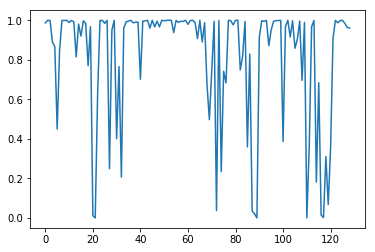

In [16]:
plt.plot(res.S_t_j[:,1])
plt.show()